Neurokit is the library used for fractal analysis of signal data.

In [ ]:
!pip install https://github.com/neuropsychology/NeuroKit.py/zipball/master

statsmodels library contains adfuller test for checking stationarity

In [ ]:
!pip install statsmodels

In [ ]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import neurokit as nk 
import nolds
import numpy as np
 
print(os.getcwd())

Make sure csv data is in same folder as this notebook.

In [28]:
signal_data= pd.read_csv('intern_dataset.csv',)

Data is segregrated based on class label.


In [29]:
class_A = signal_data[signal_data['Label']=='A'][['Signal1','Signal2']]
class_B = signal_data[signal_data['Label']=='B'][['Signal1','Signal2']]
class_C = signal_data[signal_data['Label']=='C'][['Signal1','Signal2']]

signal1= signal_data['Signal1']
signal2= signal_data['Signal2']

Scatterplot of classes

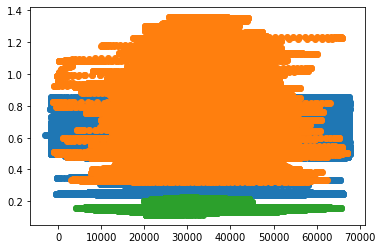

In [30]:
plt.scatter(class_A['Signal1'],class_A['Signal2'])
plt.scatter(class_B['Signal1'],class_B['Signal2'])
plt.scatter(class_C['Signal1'],class_C['Signal2'])
plt.show()

## Statistical Test for stationarity of time series
We perform statistical test to check for stationary of signal data for each class using AD Fuller test..

In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
adf_test(class_A['Signal1'])
# adf_test(class_A['Signal2'])
# adf_test(class_B['Signal1'])
# adf_test(class_B['Signal2'])
# adf_test(class_C['Signal1'])
# adf_test(class_C['Signal2'])

Output would look like this:

##**Class_A[Signal1]**:

Test Statistic                    -31.786633

p-value                             0.000000

Lags Used                         91.000000

Number of Observations Used    317908.000000

Critical Value (1%)                -3.430371

Critical Value (5%)                -2.861549

Critical Value (10%)               -2.566775

dtype: float64

##**Class_A[Signal2]**:

Results of Dickey-Fuller Test:

Test Statistic                     -3.080320

p-value                             0.028044

Lags Used                          0.000000

Number of Observations Used    317999.000000

Critical Value (1%)                -3.430371

Critical Value (5%)                -2.861549

Critical Value (10%)               -2.566775

dtype: float64



We do adf_test for each class and each and corresponding signal.

If test statistic is less than critical value, then the time series is non stationary.

If test statistic is greater than critical value, then the time series is  stationary.

Upon doing adf_test for each class and corresponding signal, it becomes evident that Signal1 is stationary and Signal2 is non stationary.

We use following methods for our fractal analysis.

#Methods well suited for stationary time series
* Hurst exponent
*Higushi Fractal Dimension

#Method well suited for non stationary time series
* Detrended fluctuation analysis


Entropy and Lyapunov Exponent were not feasible for analysis of such high number of observations and kept resulting in system crash.

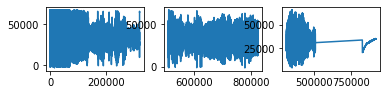

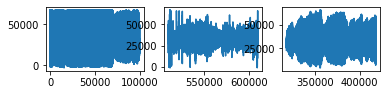

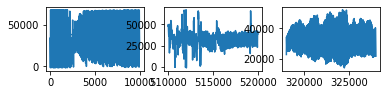

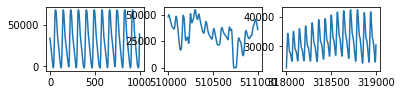

In [24]:
plt.figure()
plt.subplot(331)
plt.plot(class_A['Signal1'][:])
plt.subplot(332)
plt.plot(class_B['Signal1'][:])
plt.subplot(333)
plt.plot(class_C['Signal1'][:])
plt.figure()
plt.subplot(331)
plt.plot(class_A['Signal1'][:100000])
plt.subplot(332)
plt.plot(class_B['Signal1'][:100000])
plt.subplot(333)
plt.plot(class_C['Signal1'][:100000])
plt.figure()
plt.subplot(331)
plt.plot(class_A['Signal1'][:10000])
plt.subplot(332)
plt.plot(class_B['Signal1'][:10000])
plt.subplot(333)
plt.plot(class_C['Signal1'][:10000])
plt.figure()
plt.subplot(331)
plt.plot(class_A['Signal1'][:1000])
plt.subplot(332)
plt.plot(class_B['Signal1'][:1000])
plt.subplot(333)
plt.plot(class_C['Signal1'][:1000])
plt.show()

We plot the signal on decreasing scale to see whether pattern is self similar or not. From adf_test, we know signal1 is stationary and it can be confirmed from the plot.

Now we apply fractal analysis methods.

In [8]:
print("A:",nk.complexity_fd_higushi(class_A['Signal1'], 10),"B:",nk.complexity_fd_higushi(class_B['Signal1'], 10),"C:",nk.complexity_fd_higushi(class_C['Signal1'], 10))

A: 1.0120080884603797 B: 1.0179401873110188 C: 1.0201740820072898


/usr/local/lib/python3.6/dist-packages/neurokit/signal/complexity.py:526: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p, r1, r2, s)=np.linalg.lstsq(x, L)


Higushi Fractal dimensions determine the fractal property on local scale. 

From plot of signal1 on scale of 1000, we can observe that alternation of crest and trough is highest in Class_C, than Class_B and least in Class_A. Higushi FD shows similar results in terms of complexity of corresponding signals.

In [9]:
print("A:",nolds.hurst_rs(class_A['Signal1']),"B:",nolds.hurst_rs(class_B['Signal1']),"C:",nolds.hurst_rs(class_C['Signal1']))

A: 0.5747595732623282 B: 0.6197188130526492 C: 0.7925230776376954


Order of trend of the plots depict that Class_B is the least predictable. But hurst exponent does not show such trend. Looking at plot of scale 1000, we can see that Class_B does not have stationarity on lower scale, even though adf_test of Class_B shows overall stationarity.

In [11]:
print("A:",nolds.dfa(class_A['Signal1'][:]),"B:",nolds.dfa(class_B['Signal1'][:]),"C:",nolds.dfa(class_C['Signal1'][:]))

A: 0.5609788682639137 B: 0.5063292014415791 C: 0.7009700485193505


To address above mentioned problem, we use DFA which can also be used for non staionary series. Results of DFA shows correct behaviour. We cannot use hurst parameter H obtained from DFA to find fractal dimension as signal1 is not self similar.

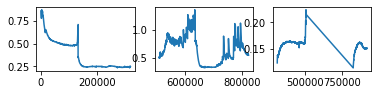

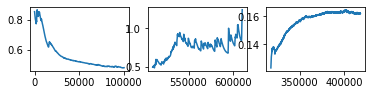

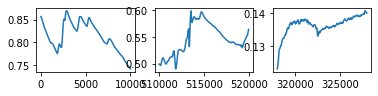

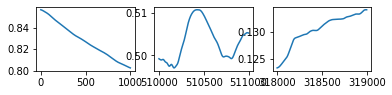

In [25]:
plt.figure()
plt.subplot(331)
plt.plot(class_A['Signal2'][:])
plt.subplot(332)
plt.plot(class_B['Signal2'][:])
plt.subplot(333)
plt.plot(class_C['Signal2'][:])
plt.figure()
plt.subplot(331)
plt.plot(class_A['Signal2'][:100000])
plt.subplot(332)
plt.plot(class_B['Signal2'][:100000])
plt.subplot(333)
plt.plot(class_C['Signal2'][:100000])
plt.figure()
plt.subplot(331)
plt.plot(class_A['Signal2'][:10000])
plt.subplot(332)
plt.plot(class_B['Signal2'][:10000])
plt.subplot(333)
plt.plot(class_C['Signal2'][:10000])
plt.figure()
plt.subplot(331)
plt.plot(class_A['Signal2'][:1000])
plt.subplot(332)
plt.plot(class_B['Signal2'][:1000])
plt.subplot(333)
plt.plot(class_C['Signal2'][:1000])
plt.show()


Above is plot of signal2 for different classes on decreasing scale. As it can be seen, Class_C maintains structure on smaller scale, followed by Class_B and then Class_A.

From adf_test of signal2, we observe that signal2 is non stationary. And non stationary time series are self similar.

Article regarding self similarity and non stationary time series: [Click Here](https://tspace.library.utoronto.ca/bitstream/1807/67917/2/Wang_Ruoqiu_201411_MAS_thesis.pdf)

In [10]:
print("A:",nolds.dfa(class_A['Signal2'][:]),"B:",nolds.dfa(class_B['Signal2'][:]),"C:",nolds.dfa(class_C['Signal2'][:]))

A: 1.8449455786257136 B: 1.817671427084764 C: 1.716038086183059


Results of DFA show that alpha>1 for signal2 further confirming that it is non stationary.

To get H parameter we subtract 1 from alpha values.

So H values for classes are:

Class_A: 0.845

Class_B: 0.818

Class_C:  0.716

For Self Similar time series, it is possible to get fractal dimension from H value

FD= 2-H

Fractal dimensions of classes are:

Class_A: 1.155

Class_B: 1.182

Class_C: 1.284

Based on Higushi Fractal Dimension for Signal1 and Fractal Dimensions of Signal2 obtained from DFA, we can conclude that Class_C is the most complex of the given classes.